In [4]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2 
import torch
import tqdm
import os

# rheology2023

### สุ่มมาจากตอนทำ VFIformer ``/media/SSD/rheology2023/``

In [9]:
import glob

files_ = []
path_root =  pd.read_csv('/home/kannika/codes_AI/CSV/rheology2023_random40folder.csv')
files_ = path_root['FolderPath'].tolist()
print(len(files_))
files_

40


['/media/SSD/rheology2023/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_174116',
 '/media/SSD/rheology2023/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_182704',
 '/media/SSD/rheology2023/DI/P0100_D0_30HZ_20XINF_UWELL_20221223_122706',
 '/media/SSD/rheology2023/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_214317',
 '/media/SSD/rheology2023/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_215050',
 '/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950',
 '/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221229_055220',
 '/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_123202',
 '/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_120633',
 '/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221229_055529',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_074912',
 '/media/SSD/rheology2023/Glycerol/GLY10/GLY10P100

## Create Text file For Predict Frame Using FLAVR Model 

In [16]:
import glob

for k in range(len(files_)) :
    #f_name_toSave = pth[:1]
    pth = f'{files_[k]}-4linedemo.txt'
    #print(pth)
    pth2save_txt = pth.replace("rheology2023", "Frame_Inter_rheology2023/pred_text")
    #print(pth2save_txt)
    mkdir_name = pth2save_txt.split('/')[:-1]
#     mkdir_name2 = pth2save_txt.split('/')[:6]
#     mkdir_name2_ = '/'.join(mkdir_name2)
    mkdir_name_ = '/'.join(mkdir_name)
    #print(mkdir_name_)
    if not os.path.exists(mkdir_name_) :
        os.makedirs(mkdir_name_)

    files = glob.glob(f"{files_[k]}/*")
    files.sort()
    #print('-'*80)
    df = pd.DataFrame(files, columns =['Path'])
    df_ = df[:-3].reset_index(drop=True)
    #print(df_.shape)
    # df2_
    df2 = pd.DataFrame(files, columns =['Path'])
    df2_ = df2[1:-2].reset_index(drop=True)
    #print(df2_.shape)
    #df3_ 
    df3 = pd.DataFrame(files, columns =['Path'])
    df3_ = df3[2:-1].reset_index(drop=True)
    #print(df3_.shape)
    #df4_ 
    df4 = pd.DataFrame(files, columns =['Path'])
    df4_ = df3[3:].reset_index(drop=True)
    #print(df3_.shape)
    #df3_ 
    df_['Path_txt'] = ''
    for i in range(len(df_)):
        name1 = df_['Path'][i]
        name2 = df2_['Path'][i]
        name3 = df3_['Path'][i]
        name4 = df4_['Path'][i]
        df_.loc[df_.index[i], 'Path_txt'] = str(name1)+' '+str(name2)+' '+str(name3)+' '+str(name4)  
    #print(df_.shape)
    list_path = df_['Path_txt'].tolist()
    with open(f'{pth2save_txt}', 'w') as f:
             for line in list_path:
                 f.write(f"{line}\n")
    print(f'On Process : Write text file name -> [ {pth2save_txt} ] ')   

On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_174116-4linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_182704-4linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221223_122706-4linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_214317-4linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_215050-4linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950-4linedemo.txt ] 
On Process : Write text file name -> [ /media/SSD/Frame_Inter_rheology2023/pred_text/SalivaTU/SAL00_D0_30H

In [13]:
print(df_['Path'][0])
print('-'*100)
print(df_['Path'][1995])

/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000001.jpg
----------------------------------------------------------------------------------------------------
/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000001996.jpg


In [14]:
tolist_txt = df_['Path_txt'].tolist()
for t in tolist_txt:
    print(t)
    print('-'*80)

/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000001.jpg /media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000003.jpg /media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000004.jpg
--------------------------------------------------------------------------------
/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000002.jpg /media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000003.jpg /media/SSD/rheology2023/Glycero

## Chek text files

In [17]:
import glob

test_demo_ = []
for k in range(len(files_)) :
    pth = f'{files_[k]}-4linedemo.txt'
    pth2save_txt = pth.replace("rheology2023", "Frame_Inter_rheology2023/pred_text")
    #print(pth2save_txt)
    test_demo_.append(pth2save_txt)
    
print(len(test_demo_))
test_demo_

40


['/media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_174116-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_182704-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221223_122706-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_214317-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/DI/P0100_D0_30HZ_20XINF_UWELL_20221222_215050-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221229_055220-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_123202-4linedemo.txt',
 '/media/SSD/Frame_Inter_rheology2023/pred_text/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_120633-4l

In [40]:
df = pd.DataFrame(test_demo_, columns =['FolderPathDemo'])
df.to_csv('/home/kannika/codes_AI/CSV/rheology2023_random40folder_4linedemo.csv')
print(df.shape)
df

(40, 1)


,FolderPathDemo
0,/media/SSD/Frame_Inter_rheology2023/pred_text/...
1,/media/SSD/Frame_Inter_rheology2023/pred_text/...
2,/media/SSD/Frame_Inter_rheology2023/pred_text/...
3,/media/SSD/Frame_Inter_rheology2023/pred_text/...
4,/media/SSD/Frame_Inter_rheology2023/pred_text/...
5,/media/SSD/Frame_Inter_rheology2023/pred_text/...
6,/media/SSD/Frame_Inter_rheology2023/pred_text/...
7,/media/SSD/Frame_Inter_rheology2023/pred_text/...
8,/media/SSD/Frame_Inter_rheology2023/pred_text/...
9,/media/SSD/Frame_Inter_rheology2023/pred_text/...


In [18]:
sequence_list_ = []
for i in range(len(test_demo_)):
    #print(test_demo_[i])
    with open(test_demo_[i], 'r') as txt:
        sequence_list = [line.strip() for line in txt]
    #print(len(sequence_list))
    sequence_list_.append(len(sequence_list))
print(len(sequence_list_))
print(f'All Dataset : {sum(sequence_list_)}')
sequence_list_

40
All Dataset : 79920


[1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998]

In [19]:
f = open(test_demo_[5], "r")
print(f.readline())

/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000001.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000002.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000003.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000004.jpg



In [20]:
f = open(test_demo_[5], "r")
print(f.read())

/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000001.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000002.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000003.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000004.jpg
/media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000002.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000003.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950/SAL00_D0_30HZ_20XINF_UWELL_20221226_121950_0000000004.jpg /media/SSD/rheology2023/SalivaTU/SAL00_D0_30HZ_20XINF_UWELL_20

---------------

## 🐥 Check Image .png type

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000001.jpg
Images Name : **GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000001.jpg, --> Shape  (800, 800, 3)
image size: 87,521 bytes


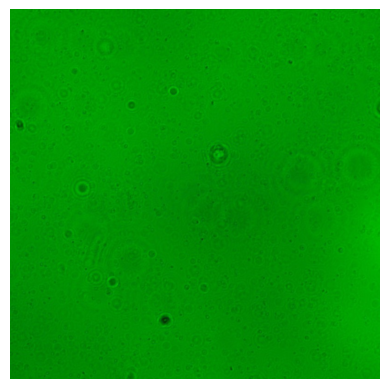

/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000002.jpg
Images Name : **GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000002.jpg, --> Shape  (800, 800, 3)
image size: 87,720 bytes


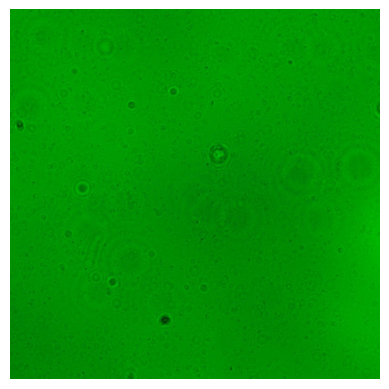

/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000003.jpg
Images Name : **GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000003.jpg, --> Shape  (800, 800, 3)
image size: 87,538 bytes


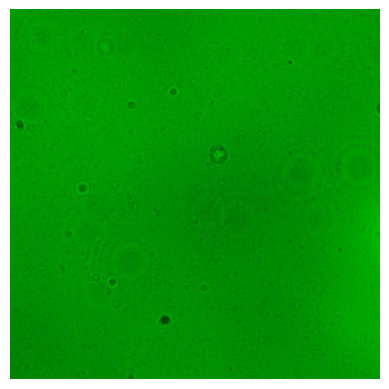

/media/SSD/rheology2023/Glycerol/GLY80/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540/GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000004.jpg
Images Name : **GLY80P100_D0_30HZ_20XINF_UWELL_20221228_115540_0000000004.jpg, --> Shape  (800, 800, 3)
image size: 87,582 bytes


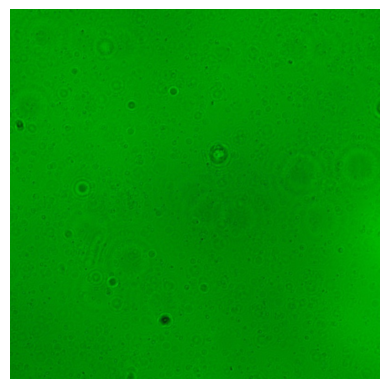

In [39]:
root_pth = list_path[0]
#root_pth
img1_path, img2_path, img3_path, img4_path = root_pth.split(' ')
ims = [img1_path, img2_path, img3_path, img4_path]
#ims
for im in ims:
    print(im)
    name_im = im.split('/')[-1]
    #print(name_im)
    image = cv2.imread(im)
    sZ = os.path.getsize(im)
    print(f"Images Name : **{name_im}, --> Shape ", image.shape)
    print(f"image size: {sZ:,} bytes")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

--------------------------------------------

### 🎞️⌨️🎦 Code Setting path to Predict Frame 

In [41]:
df = pd.read_csv('/home/kannika/codes_AI/CSV/rheology2023_random40folder_4linedemo.csv')
pd.DataFrame(test_demo_, columns =['FolderPathDemo'])
print(df.shape)
df

(40, 2)


,Unnamed: 0,FolderPathDemo
0,0,/media/SSD/Frame_Inter_rheology2023/pred_text/...
1,1,/media/SSD/Frame_Inter_rheology2023/pred_text/...
2,2,/media/SSD/Frame_Inter_rheology2023/pred_text/...
3,3,/media/SSD/Frame_Inter_rheology2023/pred_text/...
4,4,/media/SSD/Frame_Inter_rheology2023/pred_text/...
5,5,/media/SSD/Frame_Inter_rheology2023/pred_text/...
6,6,/media/SSD/Frame_Inter_rheology2023/pred_text/...
7,7,/media/SSD/Frame_Inter_rheology2023/pred_text/...
8,8,/media/SSD/Frame_Inter_rheology2023/pred_text/...
9,9,/media/SSD/Frame_Inter_rheology2023/pred_text/...
